# Analysing Deaf Speakers

In [1]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
import string
from copy import copy
import gc
import glob
import json
import string
import math
%matplotlib inline

import cv2
import torch

In [3]:
from video_utils import seconds_to_hhmmss

In [4]:
def process_text(text):
    punctuation = string.punctuation.replace("'", "")
    text = text.translate(str.maketrans('', '', punctuation))
    text = text.upper()
    return text

## Benny

### Analysing clips

In [5]:
data_dir = "../datasets/deaf-youtube/benny"
clips_dir = os.path.join(data_dir, f"sentence_clips")

clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
print(f"{len(clip_files) = }")
print(f"{clip_files = }")

len(clip_files) = 5
clip_files = ['../datasets/deaf-youtube/benny/sentence_clips/laRIaxM82dw/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/JaB9BT09nSE/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/jSk5T2aGqpM/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/dyb71EMatR0/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/XlEO7pWAc84/clips.json']


In [6]:
sentence_durations = []
sentence_lengths = []
sentence_texts = []

for clip_file_idx, clip_file in enumerate(clip_files):
    print(f"{clip_file = }")
    tracks_clips = json.load(open(clip_file))
    for track_clips in tracks_clips:
        for clip in track_clips['clips']:
            start_time = clip['start']
            end_time = clip['end']
            sentence = process_text(clip['sentence'])
            duration = end_time - start_time
            length = len(sentence.split(' '))
            sentence_durations.append(duration)
            sentence_lengths.append(length)
            sentence_texts.append(sentence)
    # break

sentence_durations = np.array(sentence_durations)
sentence_lengths = np.array(sentence_lengths)
print(len(sentence_durations))
print(len(sentence_lengths))

clip_file = '../datasets/deaf-youtube/benny/sentence_clips/laRIaxM82dw/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/JaB9BT09nSE/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/jSk5T2aGqpM/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/dyb71EMatR0/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/XlEO7pWAc84/clips.json'
398
398


In [7]:
min_idx = np.where(sentence_lengths == sentence_lengths.min())
min_idx = min_idx[0]
print(min_idx)

for min_id in min_idx:
    print(f"{min_id = } | Sentence = {sentence_texts[min_id]} | duration = {sentence_durations[min_id]}")

[  7  18  49 145 157 397]
min_id = 7 | Sentence = OOOO | duration = 2.0
min_id = 18 | Sentence = HMM | duration = 2.0
min_id = 49 | Sentence = BYE | duration = 1.59699999999998
min_id = 145 | Sentence = RIGHT | duration = 0.7789999999999999
min_id = 157 | Sentence = WOW | duration = 1.4050000000000296
min_id = 397 | Sentence = BYE | duration = 1.6589999999999918


1 12.339195979899497 33


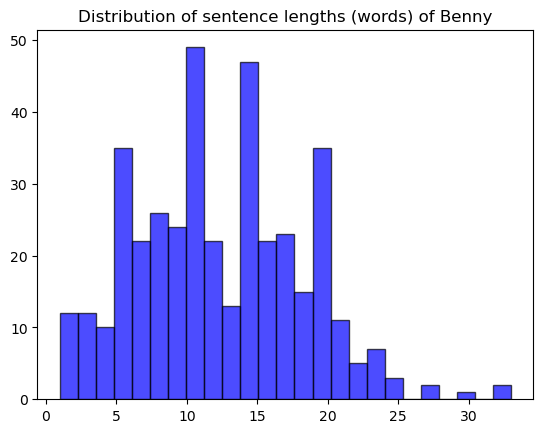

00:00:00.779 00:00:06.430 00:00:18.922
Total duration of sentences = 00:42:39.163


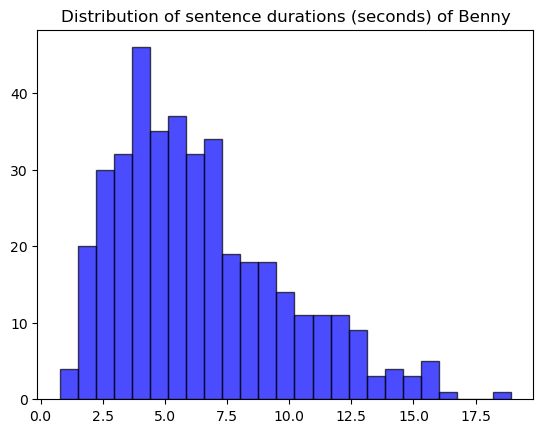

In [8]:
print(sentence_lengths.min(), sentence_lengths.mean(), sentence_lengths.max())
plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence lengths (words) of Benny")
plt.show()

print(seconds_to_hhmmss(min(sentence_durations)), seconds_to_hhmmss(sentence_durations.mean()), seconds_to_hhmmss(max(sentence_durations)))
print(f"Total duration of sentences = {seconds_to_hhmmss(sentence_durations.sum())}")
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence durations (seconds) of Benny")
plt.show()

## Benny Large

In [6]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large"
clips_dir = os.path.join(data_dir, f"sentence_clips")

clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
print(f"{len(clip_files) = }")
print(f"{clip_files = }")

len(clip_files) = 21
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/gYMy4Aioa5s/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/kStURI4ULc8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/Ovrc9mOlt2E/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/obJ9XklnwSo/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/5R1wKqS3sA8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/W0VW5lZ8Hw4/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/hPbPzlv1ojM/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/sTGbQm6juEY/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/vcqcMYsL3P8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sente

In [7]:
sentence_durations = []
sentence_lengths = []
sentence_texts = []

for clip_file_idx, clip_file in enumerate(clip_files):
    print(f"{clip_file = }")
    tracks_clips = json.load(open(clip_file))
    for track_clips in tracks_clips:
        for clip in track_clips['clips']:
            start_time = clip['start']
            end_time = clip['end']
            sentence = process_text(clip['sentence'])
            duration = end_time - start_time
            length = len(sentence.split(' '))
            sentence_durations.append(duration)
            sentence_lengths.append(length)
            sentence_texts.append(sentence)
    # break

sentence_durations = np.array(sentence_durations)
sentence_lengths = np.array(sentence_lengths)
print(len(sentence_durations))
print(len(sentence_lengths))

clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/gYMy4Aioa5s/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/kStURI4ULc8/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/Ovrc9mOlt2E/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/obJ9XklnwSo/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/5R1wKqS3sA8/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/W0VW5lZ8Hw4/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/hPbPzlv1ojM/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/sTGbQm6juEY/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/vcqcMYsL3P8/clips.json'
c

In [8]:
min_idx = np.where(sentence_lengths == sentence_lengths.min())
min_idx = min_idx[0]
print(min_idx)

for min_id in min_idx:
    print(f"{min_id = } | Sentence = {sentence_texts[min_id]} | duration = {sentence_durations[min_id]}")

[  11  109  171  183  188  193  218  632  663  869  973 1130 1287 1378
 1385 1405 1420 1537 1541 1572 1589 1648 1688 1702 1729 1730 1961 1965
 2071 2146 2184 2265]
min_id = 11 | Sentence = SO | duration = 1.813999999999993
min_id = 109 | Sentence = ERM | duration = 1.3669999999999618
min_id = 171 | Sentence = HERSHEY'S | duration = 1.7999999999999972
min_id = 183 | Sentence = REESE'S | duration = 1.1599999999999966
min_id = 188 | Sentence = TWIZZLERS | duration = 1.3000000000000114
min_id = 193 | Sentence = NERDS | duration = 0.8400000000000034
min_id = 218 | Sentence = NERDS | duration = 0.8799999999999955
min_id = 632 | Sentence = WOW | duration = 0.8999999999999773
min_id = 663 | Sentence = WOW | duration = 1.0600000000000165
min_id = 869 | Sentence = BYE | duration = 1.0579999999999927
min_id = 973 | Sentence = BYE | duration = 1.6200000000000045
min_id = 1130 | Sentence = OKAY | duration = 0.7530000000000143
min_id = 1287 | Sentence = BYE | duration = 1.6409999999999627
min_id = 1

1 10.861871138570168 32


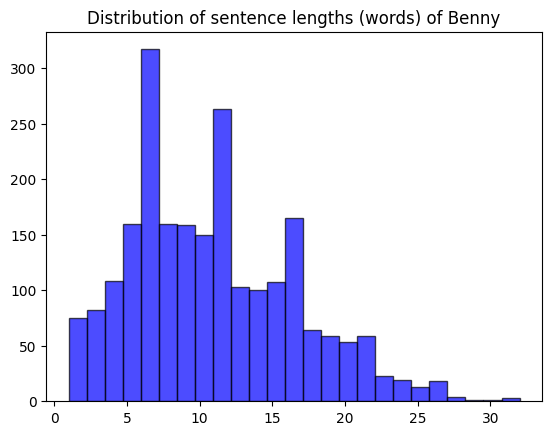

00:00:00.720 00:00:05.157 00:00:20.237
Total duration of sentences = 03:14:45.212


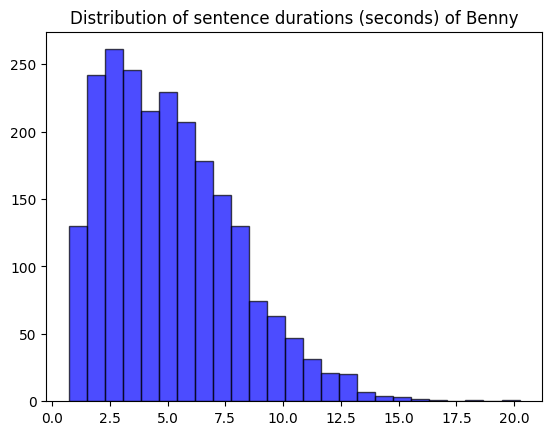

In [9]:
print(sentence_lengths.min(), sentence_lengths.mean(), sentence_lengths.max())
plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence lengths (words) of Benny")
plt.show()

print(seconds_to_hhmmss(min(sentence_durations)), seconds_to_hhmmss(sentence_durations.mean()), seconds_to_hhmmss(max(sentence_durations)))
print(f"Total duration of sentences = {seconds_to_hhmmss(sentence_durations.sum())}")
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence durations (seconds) of Benny")
plt.show()